In [1]:
import pandas as pd
import json
from pandas import json_normalize
import string
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
import torch
import numpy as np

In [3]:
with open('/Users/jacquie/Downloads/abcd_v1.1.json','r') as f:
    data = json.loads(f.read())

In [4]:
data_train = data['train']
data_dev = data['dev']
data_test = data['test']

In [5]:
df_train = pd.json_normalize(data_train, record_path =['delexed'], meta = [['convo_id'],['scenario','personal'],
                             ['scenario','order'],['scenario','product'],['scenario','flow'],['scenario','subflow']])
df_train.drop(['targets','candidates'],axis=1)

,speaker,text,turn_count,convo_id,scenario.personal,scenario.order,scenario.product,scenario.flow,scenario.subflow
0,agent,hi!,1,3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size
1,agent,how can i help you?,2,3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size
2,customer,"hi! i need to return an item, can you help me ...",3,3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size
3,agent,"sure, may i have your name please?",4,3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size
4,customer,crystal minh,5,3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size
...,...,...,...,...,...,...,...,...,...
176429,customer,ok that seemed to be the problem,14,5882,"{'customer_name': 'david williams', 'email': '...","{'street_address': '6395 primrose ave', 'full_...","{'names': ['calvin_klein boots'], 'amounts': [...",troubleshoot_site,search_results
176430,customer,thank you,15,5882,"{'customer_name': 'david williams', 'email': '...","{'street_address': '6395 primrose ave', 'full_...","{'names': ['calvin_klein boots'], 'amounts': [...",troubleshoot_site,search_results
176431,agent,is there anything else i can help with today,16,5882,"{'customer_name': 'david williams', 'email': '...","{'street_address': '6395 primrose ave', 'full_...","{'names': ['calvin_klein boots'], 'amounts': [...",troubleshoot_site,search_results
176432,customer,that is all,17,5882,"{'customer_name': 'david williams', 'email': '...","{'street_address': '6395 primrose ave', 'full_...","{'names': ['calvin_klein boots'], 'amounts': [...",troubleshoot_site,search_results


In [6]:
df_train_text = df_train.drop_duplicates(subset = ['text'],ignore_index=True)

In [7]:
for index,row in df_train_text.iterrows():
    df_train_text.at[index,'text']=row['text'].translate(str.maketrans('', '', string.punctuation))
df_train_text

df_train_text['text'].isnull().values.any()

False

In [136]:
df_train_text.iloc[87385:87395,:]

,speaker,text,turn_count,targets,candidates,convo_id,scenario.personal,scenario.order,scenario.product,scenario.flow,scenario.subflow,embeddings
87385,customer,that is great and thanks for your help,18,"[refund_update, None, None, [], -1]",[],1381,"{'customer_name': 'norman bouchard', 'email': ...","{'street_address': '7299 1st ave', 'full_addre...","{'names': ['guess boots'], 'amounts': [94]}",product_defect,refund_update,"[0.058378566, 0.03656693, 0.025129026, -0.0084..."
87386,customer,no thats all for today and thank you,20,"[refund_update, None, None, [], -1]",[],1381,"{'customer_name': 'norman bouchard', 'email': ...","{'street_address': '7299 1st ave', 'full_addre...","{'names': ['guess boots'], 'amounts': [94]}",product_defect,refund_update,"[0.09208295, 0.06939433, 0.03629066, 0.0593441..."
87387,customer,thanks you and goodbye,22,"[refund_update, None, None, [], -1]",[],1381,"{'customer_name': 'norman bouchard', 'email': ...","{'street_address': '7299 1st ave', 'full_addre...","{'names': ['guess boots'], 'amounts': [94]}",product_defect,refund_update,"[0.07567817, 0.037177686, 0.08661738, 0.049784..."
87388,customer,hi i ordered a shirt a while ago and it arrive...,2,"[return_stain, None, None, [], -1]",[],5455,"{'customer_name': 'joyce wu', 'email': 'joycew...","{'street_address': '0357 woodshore st', 'full_...","{'names': ['guess shirt'], 'amounts': [54]}",product_defect,return_stain,"[0.015724504, 0.028643453, 0.029932925, 0.0139..."
87389,customer,i was wondering if i would be able to return it,3,"[return_stain, None, None, [], -1]",[],5455,"{'customer_name': 'joyce wu', 'email': 'joycew...","{'street_address': '0357 woodshore st', 'full_...","{'names': ['guess shirt'], 'amounts': [54]}",product_defect,return_stain,"[0.069910325, -0.03548748, 0.016312582, 0.0367..."
87390,agent,sorry to hear that what is your name please,4,"[return_stain, retrieve_utterance, None, [], 64]","[29032, 14313, 35898, 39771, 24856, 2990, 1921...",5455,"{'customer_name': 'joyce wu', 'email': 'joycew...","{'street_address': '0357 woodshore st', 'full_...","{'names': ['guess shirt'], 'amounts': [54]}",product_defect,return_stain,"[0.03540805, -0.047586013, 0.053667255, 0.0143..."
87391,agent,in order to validate your purchase i will need...,7,"[return_stain, retrieve_utterance, None, [], 80]","[18804, 22703, 5601, 141, 7996, 28660, 32164, ...",5455,"{'customer_name': 'joyce wu', 'email': 'joycew...","{'street_address': '0357 woodshore st', 'full_...","{'names': ['guess shirt'], 'amounts': [54]}",product_defect,return_stain,"[0.08230052, -0.0138407815, 0.06530117, -0.016..."
87392,customer,sure thing my username is username,8,"[return_stain, None, None, [], -1]",[],5455,"{'customer_name': 'joyce wu', 'email': 'joycew...","{'street_address': '0357 woodshore st', 'full_...","{'names': ['guess shirt'], 'amounts': [54]}",product_defect,return_stain,"[0.053347744, 0.011658482, 0.06795248, 0.04633..."
87393,customer,email email,9,"[return_stain, None, None, [], -1]",[],5455,"{'customer_name': 'joyce wu', 'email': 'joycew...","{'street_address': '0357 woodshore st', 'full_...","{'names': ['guess shirt'], 'amounts': [54]}",product_defect,return_stain,"[0.02677222, -0.05724604, 0.08064222, 0.018272..."
87394,agent,what brand of shirt is it please,13,"[return_stain, retrieve_utterance, None, [], 82]","[4397, 23533, 4929, 20380, 746, 3047, 12288, 1...",5455,"{'customer_name': 'joyce wu', 'email': 'joycew...","{'street_address': '0357 woodshore st', 'full_...","{'names': ['guess shirt'], 'amounts': [54]}",product_defect,return_stain,"[0.076154165, 0.078890815, 0.0025743418, 0.052..."


In [9]:
df_train_text = df_train_text.groupby(df_train_text.speaker)
df_train_text

In [13]:
#pip install simcse

In [463]:
from simcse import SimCSE
model = SimCSE("princeton-nlp/sup-simcse-bert-base-uncased")

In [17]:
sentences = df_train_text['text'].tolist() 
embeddings = model.encode(sentences)

100%|█████████████████████████████████████| 1383/1383 [3:51:55<00:00, 10.06s/it]


In [ ]:
embeddings.size()

In [18]:
emb_list = list(embeddings)

In [19]:
df_train_text['embeddings']=emb_list

/var/folders/9n/8f8tw33x39q80hpxvzwrs8mh0000gn/T/ipykernel_10121/2554946310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_text['embeddings']=emb_list


In [20]:
emb_np_list = []
for t in emb_list:
    emb_np_list.append(t.numpy())

In [ ]:
emb_np_list[0][1]

0.017801136

In [ ]:
test = emb_list[0]
t = test.numpy()
for j in t:
    j = float(j)
type(t)
type(t[0])

numpy.float32

In [23]:
df_train_text['embeddings']=emb_np_list

/var/folders/9n/8f8tw33x39q80hpxvzwrs8mh0000gn/T/ipykernel_10121/3121365964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_text['embeddings']=emb_np_list


In [27]:
agent_df = df_train_text.loc[df_train_text.speaker=='agent']
customer_df = df_train_text.loc[df_train_text.speaker=='customer']

In [196]:
agent_df = df_train_text.loc[df_train_text.speaker=='agent']

In [41]:
customer_text = list(customer_df.embeddings)
agent_text = list(agent_df.embeddings)

In [ ]:
cost =[]
list1 = [100,200,300,400,500,600,700,800,1000]
for i in list1:
    KM = KMeans(n_clusters = i, max_iter = 1)
    KM.fit(customer_text)

    cost.append(KM.inertia_)

In [39]:
import matplotlib.pyplot as plt

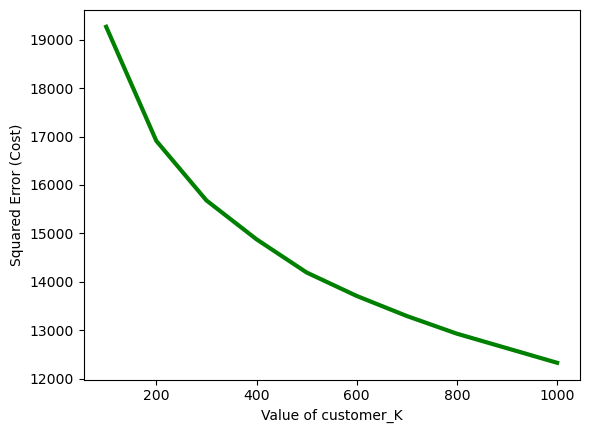

In [42]:
plt.plot(list1, cost, color ='g', linewidth ='3')
plt.xlabel("Value of customer_K")
plt.ylabel("Squared Error (Cost)")
plt.show()

In [51]:
cost_agent =[]
list1 = [100,200,300,400,500,600,700,800,900,1000]
for i in list1:
    KM = KMeans(n_clusters = i, max_iter = 1)
    KM.fit(agent_text)

    cost_agent.append(KM.inertia_)    

KMeans(max_iter=1, n_clusters=100)finished
KMeans(max_iter=1, n_clusters=200)finished
KMeans(max_iter=1, n_clusters=300)finished
KMeans(max_iter=1, n_clusters=400)finished
KMeans(max_iter=1, n_clusters=500)finished
KMeans(max_iter=1, n_clusters=600)finished
KMeans(max_iter=1, n_clusters=700)finished
KMeans(max_iter=1, n_clusters=800)finished
KMeans(max_iter=1, n_clusters=900)finished
KMeans(max_iter=1, n_clusters=1000)finished


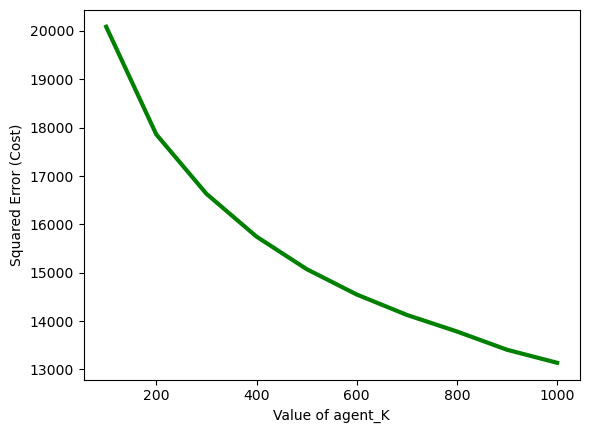

In [52]:
plt.plot(list1, cost_agent, color ='g', linewidth ='3')
plt.xlabel("Value of agent_K")
plt.ylabel("Squared Error (Cost)")
plt.show()

In [ ]:
# range_n_clusters = [2000,2500,3000,3500,4000,4500,5000,5500,6000,6500,7000,7500,8000,8500]
# silhouette_avg = []
# for num_clusters in range_n_clusters:
 
#  # initialise kmeans
#     KM_silhouette = KMeans(n_clusters=num_clusters,max_iter=1)
#     print(str(KM_silhouette)+"cfinished")
#     KM_silhouette.fit(embeddings)
#     cluster_labels = KM_silhouette.labels_
 
#  # silhouette score
#     silhouette_avg.append(silhouette_score(embeddings, cluster_labels))
# plt.plot(range_n_clusters,silhouette_avg)
# plt.xlabel("Values of K") 
# plt.ylabel("Silhouette score") 
# plt.title("Silhouette analysis For Optimal k")
# plt.show()

In [53]:
KM = KMeans(n_clusters=300, random_state=0)
KM.fit(customer_text)

KMeans(n_clusters=300, random_state=0)

In [55]:
customer_kmeans = KM.predict(customer_text)

In [58]:
KM.fit(agent_text)
agent_kmeans = KM.predict(agent_text)

In [149]:
customer_df['customer_cluster'] = customer_kmeans

/var/folders/9n/8f8tw33x39q80hpxvzwrs8mh0000gn/T/ipykernel_10121/1911625802.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['customer_cluster'] = customer_kmeans


In [150]:
customer_df['customer_cluster'].values

array([ 35, 274, 122, ..., 276,  41, 217], dtype=int32)

In [197]:
agent_df['agent_cluster'] = agent_kmeans

/var/folders/9n/8f8tw33x39q80hpxvzwrs8mh0000gn/T/ipykernel_10121/3457679909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_df['agent_cluster'] = agent_kmeans


In [60]:
#df_train_text[df_train_text.cluster==266].iloc[:,1].values
dist_centers = KM.transform(customer_text)

In [190]:
dist_centers_agent = KM.transform(agent_text)

In [61]:
import numpy as np
other_nearest = np.argsort(dist_centers, axis=1)

In [191]:
other_nearest_agent = np.argsort(dist_centers_agent, axis=1)

In [ ]:
#list(other_nearest)

In [ ]:
#df_train_text['prev_cluster'] = other_nearest

In [62]:
prev_cluster_1_list = []
for i in range(0,len(other_nearest)):
    prev_cluster_1_list.append(other_nearest[i][1])
len(prev_cluster_1_list)

39438

In [63]:
prev_cluster_2_list = []
for i in range(0,len(other_nearest)):
    prev_cluster_2_list.append(other_nearest[i][2])
len(prev_cluster_2_list)

39438

In [64]:
prev_cluster_3_list = []
for i in range(0,len(other_nearest)):
    prev_cluster_3_list.append(other_nearest[i][3])
len(prev_cluster_3_list)

39438

In [193]:
prev_cluster_1_list_agent = []
for i in range(0,len(other_nearest_agent)):
    prev_cluster_1_list_agent.append(other_nearest_agent[i][1])
len(prev_cluster_1_list_agent)
prev_cluster_2_list_agent = []
for i in range(0,len(other_nearest_agent)):
    prev_cluster_2_list_agent.append(other_nearest_agent[i][2])
len(prev_cluster_2_list_agent)
prev_cluster_3_list_agent = []
for i in range(0,len(other_nearest_agent)):
    prev_cluster_3_list_agent.append(other_nearest_agent[i][3])
len(prev_cluster_3_list_agent)

47452

In [66]:
customer_df['prev_cluster_1_cus']=prev_cluster_1_list
customer_df['prev_cluster_2_cus']=prev_cluster_2_list
customer_df['prev_cluster_3_cus']=prev_cluster_3_list

/var/folders/9n/8f8tw33x39q80hpxvzwrs8mh0000gn/T/ipykernel_10121/2074068932.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['prev_cluster_1_cus']=prev_cluster_1_list
/var/folders/9n/8f8tw33x39q80hpxvzwrs8mh0000gn/T/ipykernel_10121/2074068932.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_df['prev_cluster_2_cus']=prev_cluster_2_list
/var/folders/9n/8f8tw33x39q80hpxvzwrs8mh0000gn/T/ipykernel_10121/2074068932.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of 

In [198]:
agent_df['prev_cluster_1_ag']=prev_cluster_1_list_agent
agent_df['prev_cluster_2_ag']=prev_cluster_2_list_agent
agent_df['prev_cluster_3_ag']=prev_cluster_3_list_agent

/var/folders/9n/8f8tw33x39q80hpxvzwrs8mh0000gn/T/ipykernel_10121/2021566462.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_df['prev_cluster_1_ag']=prev_cluster_1_list_agent
/var/folders/9n/8f8tw33x39q80hpxvzwrs8mh0000gn/T/ipykernel_10121/2021566462.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  agent_df['prev_cluster_2_ag']=prev_cluster_2_list_agent
/var/folders/9n/8f8tw33x39q80hpxvzwrs8mh0000gn/T/ipykernel_10121/2021566462.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [67]:
customer_df.head()

,speaker,text,turn_count,targets,candidates,convo_id,scenario.personal,scenario.order,scenario.product,scenario.flow,scenario.subflow,embeddings,customer_cluster,prev_cluster_1_cus,prev_cluster_2_cus,prev_cluster_3_cus
2,customer,hi i need to return an item can you help me wi...,3,"[return_size, None, None, [], -1]",[],3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size,"[0.06940104, -0.015469296, -0.010481055, 0.010...",35,45,156,194
4,customer,crystal minh,5,"[return_size, None, None, [], -1]",[],3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size,"[-0.0322499, 0.01462503, 0.033327106, -0.00745...",274,169,32,168
7,customer,i got the wrong size,8,"[return_size, None, None, [], -1]",[],3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size,"[0.038983647, -0.00017434303, -0.039691035, -0...",122,263,262,226
9,customer,username username,10,"[return_size, None, None, [], -1]",[],3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size,"[0.04166411, 0.015305921, 0.047348674, 0.06004...",66,284,21,208
10,customer,email,11,"[return_size, None, None, [], -1]",[],3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size,"[0.03324161, -0.045217346, 0.07721463, 0.01181...",289,166,21,97


In [199]:
agent_df.head()

,speaker,text,turn_count,targets,candidates,convo_id,scenario.personal,scenario.order,scenario.product,scenario.flow,scenario.subflow,embeddings,agent_cluster,prev_cluster_1_ag,prev_cluster_2_ag,prev_cluster_3_ag
0,agent,hi,1,"[return_size, retrieve_utterance, None, [], 87]","[27949, 7582, 13567, 17765, 36101, 3654, 19384...",3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size,"[0.06466573, 0.017801136, 0.049811404, -0.0378...",187,92,146,64
1,agent,how can i help you,2,"[return_size, retrieve_utterance, None, [], 35]","[20663, 33978, 3924, 8821, 3852, 34217, 18993,...",3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size,"[0.072852075, -0.039431594, 0.002799019, -0.00...",64,146,22,255
3,agent,sure may i have your name please,4,"[return_size, retrieve_utterance, None, [], 21]","[19667, 32391, 22335, 16896, 10781, 16285, 101...",3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size,"[0.08837001, 0.015443107, 0.049500782, -0.0176...",13,132,77,190
5,agent,thanks may i ask the reason for the return,6,"[return_size, retrieve_utterance, None, [], 62]","[25834, 38107, 21335, 17115, 22152, 34422, 218...",3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size,"[0.0977734, -0.019383918, 0.018418984, -0.0116...",293,156,85,45
8,agent,ok may i have your username email address and ...,9,"[return_size, retrieve_utterance, None, [], 71]","[1926, 3800, 10364, 23152, 9810, 251, 27885, 2...",3592,"{'customer_name': 'crystal minh', 'email': 'cm...","{'street_address': '6821 1st ave', 'full_addre...","{'names': ['michael_kors jeans'], 'amounts': [...",product_defect,return_size,"[0.06752075, -0.023414182, 0.05707629, 0.00067...",192,21,46,249


In [ ]:
# df_train_text_copy = df_train_text.groupby(df_train_text.speaker)

In [ ]:
# df_train_text_copy
# df_new_customer = df_train_text_copy.get_group("customer")
# df_new_customer

In [ ]:
# df_train_text_copy
# df_new_agent = df_train_text_copy.get_group("agent")
# df_new_agent

In [456]:
len(customer_df['scenario.subflow'].unique())

96

In [457]:
customer_df['scenario.subflow'].unique()

array(['return_size', 'refund_status', 'timing_4', 'manage', 'pricing_3',
       'manage_extension', 'recover_username', 'shopping_cart', 'status',
       'jacket_how_2', 'credit_card', 'timing_2', 'slow_speed',
       'status_quantity', 'mistimed_billing_already_returned',
       'jeans_how_4', 'status_due_date', 'recover_password', 'pricing_1',
       'manage_pay_bill', 'jeans_how_1', 'status_payment_method',
       'refund_update', 'policy_2', 'pricing_2', 'membership_2',
       'search_results', 'timing_3', 'refund_initiate', 'return_color',
       'missing', 'out_of_stock_general', 'status_questions',
       'shirt_other_2', 'reset_2fa', 'bad_price_competitor',
       'jeans_how_2', 'status_mystery_fee', 'status_credit_missing',
       'status_shipping_question', 'manage_downgrade', 'cost',
       'membership_3', 'jeans_other_2', 'manage_change_phone',
       'jacket_other_3', 'mistimed_billing_never_bought',
       'status_delivery_time', 'status_due_amount',
       'out_of_stock

In [201]:
one_hot_encoded_data = pd.get_dummies(customer_df, columns = ['scenario.flow', 'scenario.subflow'])
one_hot_encoded_data
one_hot_encoded_data = one_hot_encoded_data.drop(['speaker','text','targets','candidates','convo_id','scenario.personal','scenario.order','scenario.product'],axis=1)
len(one_hot_encoded_data.columns)

112

In [202]:
one_hot_encoded_data.head()

,turn_count,embeddings,customer_cluster,prev_cluster_1_cus,prev_cluster_2_cus,prev_cluster_3_cus,scenario.flow_account_access,scenario.flow_manage_account,scenario.flow_order_issue,scenario.flow_product_defect,...,scenario.subflow_status_payment_method,scenario.subflow_status_quantity,scenario.subflow_status_questions,scenario.subflow_status_service_added,scenario.subflow_status_service_removed,scenario.subflow_status_shipping_question,scenario.subflow_timing_1,scenario.subflow_timing_2,scenario.subflow_timing_3,scenario.subflow_timing_4
2,3,"[0.06940104, -0.015469296, -0.010481055, 0.010...",35,45,156,194,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,"[-0.0322499, 0.01462503, 0.033327106, -0.00745...",274,169,32,168,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,8,"[0.038983647, -0.00017434303, -0.039691035, -0...",122,263,262,226,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,10,"[0.04166411, 0.015305921, 0.047348674, 0.06004...",66,284,21,208,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10,11,"[0.03324161, -0.045217346, 0.07721463, 0.01181...",289,166,21,97,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [203]:
# classification
feature_list = list(one_hot_encoded_data.iloc[:,0:112].columns)
feature_list.pop(1)

'embeddings'

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score

In [204]:
expected_agent_cluster=[]
expected_agent_cluster_2=[]
expected_agent_cluster_3=[]
for index,row in one_hot_encoded_data.iterrows():
    agent_index = index+1
    while(agent_index not in list(agent_df.index)):
        agent_index+=1
    if agent_df.turn_count[agent_index]<one_hot_encoded_data.turn_count[index]:
        expected_agent_cluster.append(-1)
        expected_agent_cluster_2.append(-1)
        expected_agent_cluster_3.append(-1)
    else:
        expected_agent_cluster.append(agent_df.agent_cluster[agent_index])
        expected_agent_cluster_2.append(agent_df.prev_cluster_1_ag[agent_index])
        expected_agent_cluster_3.append(agent_df.prev_cluster_2_ag[agent_index])
        
one_hot_encoded_data['expected_agent_cluster_1'] = expected_agent_cluster
one_hot_encoded_data['expected_agent_cluster_2'] = expected_agent_cluster_2
one_hot_encoded_data['expected_agent_cluster_3'] = expected_agent_cluster_3
one_hot_encoded_data.head()

,turn_count,embeddings,customer_cluster,prev_cluster_1_cus,prev_cluster_2_cus,prev_cluster_3_cus,scenario.flow_account_access,scenario.flow_manage_account,scenario.flow_order_issue,scenario.flow_product_defect,...,scenario.subflow_status_service_added,scenario.subflow_status_service_removed,scenario.subflow_status_shipping_question,scenario.subflow_timing_1,scenario.subflow_timing_2,scenario.subflow_timing_3,scenario.subflow_timing_4,expected_agent_cluster_1,expected_agent_cluster_2,expected_agent_cluster_3
2,3,"[0.06940104, -0.015469296, -0.010481055, 0.010...",35,45,156,194,0,0,0,1,...,0,0,0,0,0,0,0,13,132,77
4,5,"[-0.0322499, 0.01462503, 0.033327106, -0.00745...",274,169,32,168,0,0,0,1,...,0,0,0,0,0,0,0,293,156,85
7,8,"[0.038983647, -0.00017434303, -0.039691035, -0...",122,263,262,226,0,0,0,1,...,0,0,0,0,0,0,0,192,21,46
9,10,"[0.04166411, 0.015305921, 0.047348674, 0.06004...",66,284,21,208,0,0,0,1,...,0,0,0,0,0,0,0,152,39,14
10,11,"[0.03324161, -0.045217346, 0.07721463, 0.01181...",289,166,21,97,0,0,0,1,...,0,0,0,0,0,0,0,152,39,14


In [270]:
expected_agent_cluster=[]
for index,row in one_hot_encoded_data.iterrows():
    agent_index = index+1
    while(agent_index not in list(agent_df.index)):
        agent_index+=1
    if agent_df.turn_count[agent_index]<one_hot_encoded_data.turn_count[index]:
        expected_agent_cluster_sub=[]
        expected_agent_cluster_sub.append(-1)
        expected_agent_cluster_sub.append(-1)
        expected_agent_cluster_sub.append(-1)
    else:
        expected_agent_cluster_sub=[]
        expected_agent_cluster_sub.append(agent_df.agent_cluster[agent_index])
        expected_agent_cluster_sub.append(agent_df.prev_cluster_1_ag[agent_index])
        expected_agent_cluster_sub.append(agent_df.prev_cluster_2_ag[agent_index])
    expected_agent_cluster.append(np.array(expected_agent_cluster_sub))
one_hot_encoded_data['expected_agent_cluster'] = expected_agent_cluster
one_hot_encoded_data.head()

,turn_count,embeddings,customer_cluster,prev_cluster_1_cus,prev_cluster_2_cus,prev_cluster_3_cus,scenario.flow_account_access,scenario.flow_manage_account,scenario.flow_order_issue,scenario.flow_product_defect,...,scenario.subflow_status_service_removed,scenario.subflow_status_shipping_question,scenario.subflow_timing_1,scenario.subflow_timing_2,scenario.subflow_timing_3,scenario.subflow_timing_4,expected_agent_cluster_1,expected_agent_cluster_2,expected_agent_cluster_3,expected_agent_cluster
2,3,"[0.06940104, -0.015469296, -0.010481055, 0.010...",35,45,156,194,0,0,0,1,...,0,0,0,0,0,0,13,132,77,"[13, 132, 77]"
4,5,"[-0.0322499, 0.01462503, 0.033327106, -0.00745...",274,169,32,168,0,0,0,1,...,0,0,0,0,0,0,293,156,85,"[293, 156, 85]"
7,8,"[0.038983647, -0.00017434303, -0.039691035, -0...",122,263,262,226,0,0,0,1,...,0,0,0,0,0,0,192,21,46,"[192, 21, 46]"
9,10,"[0.04166411, 0.015305921, 0.047348674, 0.06004...",66,284,21,208,0,0,0,1,...,0,0,0,0,0,0,152,39,14,"[152, 39, 14]"
10,11,"[0.03324161, -0.045217346, 0.07721463, 0.01181...",289,166,21,97,0,0,0,1,...,0,0,0,0,0,0,152,39,14,"[152, 39, 14]"


In [295]:
y = np.asarray(one_hot_encoded_data[one_hot_encoded_data.columns[112:115]])
X = one_hot_encoded_data[feature_list]

In [ ]:
X.head()

In [279]:
print("Number of examples: " + str(X.shape[0]))
print("\nNumber of Features:" + str(X.shape[1]))

Number of examples: 35080

Number of Features:111


In [296]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 1234)
print(X_train.shape)
print(X_test.shape)

(28064, 111)
(7016, 111)


In [361]:
 # 1. Create the  scikit-learn LogisticRegression model object below and assign to variable 'model'
from sklearn.multioutput import MultiOutputClassifier
model_lg = MultiOutputClassifier(LogisticRegression(solver = 'newton-cg',multi_class='multinomial',verbose=1,max_iter=300))

In [362]:
# 2. Fit the model to the training data below
model_lg.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/jacquie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 88.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/jacquie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 86.1min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/jacquie/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done   1 out of   1 | ela

MultiOutputClassifier(estimator=LogisticRegression(max_iter=300,
                                                   multi_class='multinomial',
                                                   solver='newton-cg',
                                                   verbose=1))

In [363]:
y_test[0:5]

array([[144,  99,  83],
       [ 70,  90, 209],
       [ 10,  37, 155],
       [238,  93,  54],
       [ 52, 248,  11]])

In [342]:
X_test[0:10]

,turn_count,customer_cluster,prev_cluster_1_cus,prev_cluster_2_cus,prev_cluster_3_cus,scenario.flow_account_access,scenario.flow_manage_account,scenario.flow_order_issue,scenario.flow_product_defect,scenario.flow_purchase_dispute,...,scenario.subflow_status_payment_method,scenario.subflow_status_quantity,scenario.subflow_status_questions,scenario.subflow_status_service_added,scenario.subflow_status_service_removed,scenario.subflow_status_shipping_question,scenario.subflow_timing_1,scenario.subflow_timing_2,scenario.subflow_timing_3,scenario.subflow_timing_4
46615,2,254,28,157,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20249,4,60,285,45,246,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65092,17,267,119,85,228,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
27237,4,271,133,60,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61948,15,282,209,246,285,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
58636,15,216,97,21,284,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
18519,5,199,262,95,98,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
58160,15,6,18,177,72,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
35309,14,73,246,173,274,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
54406,13,153,207,253,244,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [444]:
class_label_predictions = model_lg.predict(X_test)
print('Class labels: ' + str(class_label_predictions[1]))

Class labels: [290  20 150]


In [ ]:
df_train_text.iloc[58637,1]

'great as one of our gold members you do get unlimited returns please provide me with your shipping address so that i can send you a return shipping label'

In [379]:
print(model_lg.score(X_train,y_train))

0.01795895096921323


In [ ]:
customer_df[customer_df['customer_cluster']== 254].text

172      i think at this point id rather just cancel th...
1481     that is okay so the other items are cancelled ...
2041          id like to cancel the order and get a refund
3710                                            yes cancel
5961     if i dont get it by tomorrow i would like to c...
                               ...                        
86452    no i just need to cancel the order for now please
87231    i placed an order but i have changed my mind i...
87241                i would like to just cancel the order
87721    if you are not able to change this i will need...
87729    please cancel the order if you cannot overnigh...
Name: text, Length: 126, dtype: object

In [ ]:
agent_df[agent_df['agent_cluster']== 192].text

8        ok may i have your username email address and ...
35       additional to this you would give me the order...
195      and to get your order details may i ask your u...
248      okay can i have yoru username email address an...
306      now could you give me your username email and ...
                               ...                        
87900    may i now have your username email and order i...
87955    can i get your username email address and orde...
88119    thanks for that can i have your username email...
88127    can i have your name username email address an...
88168    thank you norman now can i also get your usern...
Name: text, Length: 912, dtype: object

In [ ]:
agent_df[agent_df['agent_cluster']== 121].text

401      youre new password is 453rp2zdmkq once you log...
761         we will have to start with a username recovery
1765     the reset code will give you access to your ac...
2848     i will also update your account so this is the...
3382     if you are certain it is not on hand please co...
                               ...                        
84064    your new password is dt8auvktj2j you can chang...
84072    and what is the username for the account you n...
86800    so here is your new temporary username you can...
87088    you should be able to login now  you can chang...
87427    there should be an option to change it in your...
Name: text, Length: 104, dtype: object

In [434]:
agent_df[agent_df['agent_cluster']== 158].text

83                             all taken care of
315                             all set mr david
2434                       there you are all set
3250                         you will be all set
3942                                     all set
                          ...                   
82056         great i have you all taken care of
83203                     you are all set joseph
86770    ok you are all set now with your return
87588                                    all set
88228                  you should be all set now
Name: text, Length: 95, dtype: object

In [445]:
candidates = []
for i in list(class_label_predictions[1]):
    d = KM.transform(np.asarray(list(agent_df[agent_df['agent_cluster']== i].embeddings)))[:, i]
    ind = np.argsort(d)[::-1][0]
    target = np.asarray(list(agent_df[agent_df['agent_cluster']== i].embeddings))[ind]
    for index in agent_df[agent_df['agent_cluster']== i].index:
        if np.array_equal(target,agent_df['embeddings'][index]):
            candidates.append(agent_df['text'][index])
            break

In [476]:
sentences_b = 'im sorry to hear that ill help you troubleshoot just give me a moment to look something up'
similarities = []
for sentence in candidates:
    print("'" + sentence +"'"+' vs. ' +"'"+sentences_b+"'")
    similarities.append(model.similarity(sentence, sentences_b))

'youre sure the card isnt old then' vs. 'im sorry to hear that ill help you troubleshoot just give me a moment to look something up'


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.74it/s]


'first will you please reenter your cc info' vs. 'im sorry to hear that ill help you troubleshoot just give me a moment to look something up'


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.65it/s]


'is your checkout working for you after you logged back in' vs. 'im sorry to hear that ill help you troubleshoot just give me a moment to look something up'


100%|█████████████████████████████████████████████| 1/1 [00:00<00:00,  6.77it/s]


In [477]:
similarities

[0.1116250604391098, 0.37031400203704834, 0.2984759509563446]

In [481]:
print('customer text: '+df_train_text.iloc[20249].text)
print('agent true text: '+df_train_text.iloc[20250].text)
print('predictions: ')
num = 1
for i in candidates:
    print(str(num)+'. '+i)
    num+=1

customer text: i am trying to buy a product but my credit card keeps getting rejected
agent true text: im sorry to hear that  ill help you troubleshoot   just give me a moment to look something up
predictions: 
1. youre sure the card isnt old then
2. first will you please reenter your cc info
3. is your checkout working for you after you logged back in


In [399]:
ind = np.argsort(d)[::-1][0]

10

In [417]:
target = np.asarray(list(agent_df[agent_df['agent_cluster']== 144].embeddings))[ind]
x = []
for index in agent_df[agent_df['agent_cluster']== 144].index:
    if np.array_equal(target,agent_df['embeddings'][index]):
        x = agent_df['text'][index]
        break
x

'i hope that the swat team pays for all your healthcare due to their mistake'

In [ ]:
df_dev = pd.json_normalize(data_dev, record_path =['delexed'], meta = [['convo_id'],['scenario','personal'],
                             ['scenario','order'],['scenario','product'],['scenario','flow'],['scenario','subflow']])
df_dev.drop(['targets','candidates'],axis=1)

In [ ]:
pip install faiss-cpu

In [ ]:
df_test = pd.json_normalize(data_test, record_path =['delexed'], meta = [['convo_id'],['scenario','personal'],
                             ['scenario','order'],['scenario','product'],['scenario','flow'],['scenario','subflow']])
df_test.drop(['targets','candidates'],axis=1)